In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("wildfires_training.csv")

In [3]:
df

,fire,year,temp,humidity,rainfall,drought_code,buildup_index,day,month,wind_speed
0,no,2015,28,59,0.0,8.06,3.47,1,6,19
1,no,2010,30,61,1.3,8.17,4.03,2,6,13
2,no,2009,26,83,13.1,8.08,3.59,3,6,22
3,no,2017,25,87,2.5,7.18,2.42,4,6,15
4,no,2014,28,77,0.0,14.98,4.63,5,6,18
...,...,...,...,...,...,...,...,...,...,...
149,yes,2017,31,67,0.0,45.15,17.89,26,9,15
150,no,2017,29,89,4.4,8.74,6.52,27,9,15
151,no,2009,27,88,0.5,8.87,3.71,28,9,30
152,no,2016,25,56,0.1,15.54,6.10,29,9,20


In [4]:
from sklearn.preprocessing import OrdinalEncoder

In [5]:
is_fire = ['no', 'yes']

In [6]:
enc = OrdinalEncoder(categories=[is_fire])

In [7]:
df['fire'] = enc.fit_transform(df[['fire']])

In [8]:
df

,fire,year,temp,humidity,rainfall,drought_code,buildup_index,day,month,wind_speed
0,0.0,2015,28,59,0.0,8.06,3.47,1,6,19
1,0.0,2010,30,61,1.3,8.17,4.03,2,6,13
2,0.0,2009,26,83,13.1,8.08,3.59,3,6,22
3,0.0,2017,25,87,2.5,7.18,2.42,4,6,15
4,0.0,2014,28,77,0.0,14.98,4.63,5,6,18
...,...,...,...,...,...,...,...,...,...,...
149,1.0,2017,31,67,0.0,45.15,17.89,26,9,15
150,0.0,2017,29,89,4.4,8.74,6.52,27,9,15
151,0.0,2009,27,88,0.5,8.87,3.71,28,9,30
152,0.0,2016,25,56,0.1,15.54,6.10,29,9,20


In [9]:
df = df.drop(columns=['year','day','wind_speed', 'month'])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop('fire', axis=1)

In [12]:
y = df['fire']

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
X_train, X_validate, y_train, y_validate = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

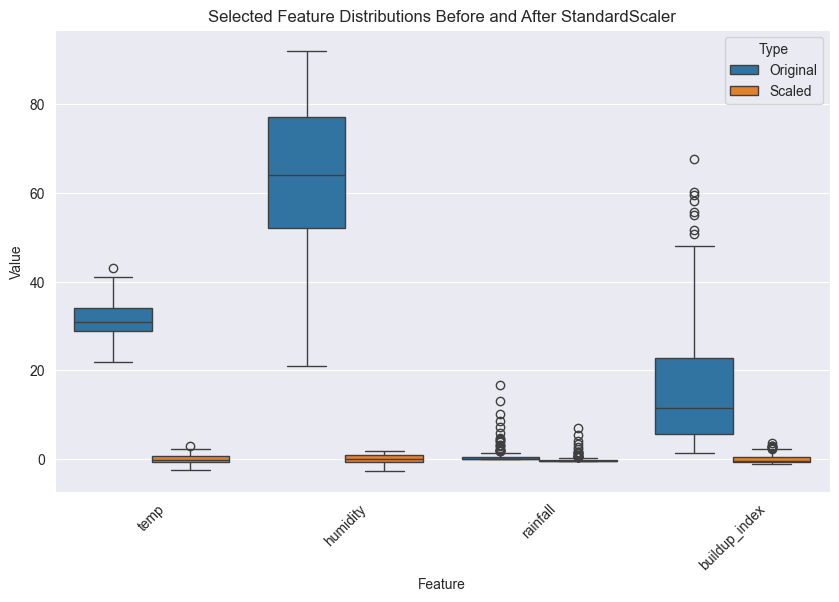

In [15]:
features_to_plot = ['temp', 'humidity', 'rainfall', 'buildup_index']
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

X_subset = X[features_to_plot]
X_scaled_subset = pd.DataFrame(X_scaled_df[features_to_plot], columns=features_to_plot)

X_orig_long = X_subset.melt(var_name='Feature', value_name='Value')
X_orig_long['Type'] = 'Original'

X_scaled_long = X_scaled_subset.melt(var_name='Feature', value_name='Value')
X_scaled_long['Type'] = 'Scaled'

combined = pd.concat([X_orig_long, X_scaled_long])

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Feature', y='Value', hue='Type', data=combined)
plt.title('Selected Feature Distributions Before and After StandardScaler')
plt.xticks(rotation=45)
plt.show()

In [16]:
from sklearn import svm

In [17]:
model = svm.SVC(
    C = 1.0,
    gamma = 'auto',
    kernel = 'rbf',
)

In [18]:
model.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'auto'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [20]:
y_pred = model.predict(X_validate)

In [21]:
print("Validation Accuracy:", accuracy_score(y_validate, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_validate, y_pred))
print("\nClassification Report:\n", classification_report(y_validate, y_pred))

Validation Accuracy: 0.8709677419354839

Confusion Matrix:
 [[16  1]
 [ 3 11]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.94      0.89        17
         1.0       0.92      0.79      0.85        14

    accuracy                           0.87        31
   macro avg       0.88      0.86      0.87        31
weighted avg       0.88      0.87      0.87        31



In [22]:
C_values = [0.01, 0.1, 1, 10, 100]
gamma_values = [0.001, 0.01, 0.1, 1, 10]

In [23]:
results = []

for C in C_values:
    for gamma in gamma_values:
        model = svm.SVC(C=C, gamma=gamma, kernel='rbf')
        model.fit(X_train, y_train)
        y_pred = model.predict(X_validate)
        acc = accuracy_score(y_validate, y_pred)
        results.append((C, gamma, acc))
        print(f"C={C}, gamma={gamma} --> Accuracy={acc:}")

C=0.01, gamma=0.001 --> Accuracy=0.45161290322580644
C=0.01, gamma=0.01 --> Accuracy=0.45161290322580644
C=0.01, gamma=0.1 --> Accuracy=0.45161290322580644
C=0.01, gamma=1 --> Accuracy=0.45161290322580644
C=0.01, gamma=10 --> Accuracy=0.45161290322580644
C=0.1, gamma=0.001 --> Accuracy=0.45161290322580644
C=0.1, gamma=0.01 --> Accuracy=0.6451612903225806
C=0.1, gamma=0.1 --> Accuracy=0.8709677419354839
C=0.1, gamma=1 --> Accuracy=0.6451612903225806
C=0.1, gamma=10 --> Accuracy=0.45161290322580644
C=1, gamma=0.001 --> Accuracy=0.7741935483870968
C=1, gamma=0.01 --> Accuracy=0.8709677419354839
C=1, gamma=0.1 --> Accuracy=0.8709677419354839
C=1, gamma=1 --> Accuracy=0.8709677419354839
C=1, gamma=10 --> Accuracy=0.7419354838709677
C=10, gamma=0.001 --> Accuracy=0.8709677419354839
C=10, gamma=0.01 --> Accuracy=0.9032258064516129
C=10, gamma=0.1 --> Accuracy=0.8709677419354839
C=10, gamma=1 --> Accuracy=0.7419354838709677
C=10, gamma=10 --> Accuracy=0.7741935483870968
C=100, gamma=0.001 --> 

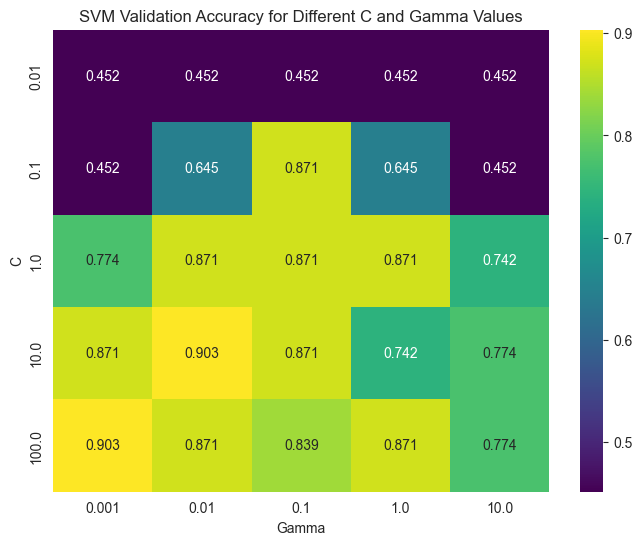

In [24]:
df_results = pd.DataFrame(results, columns=['C', 'gamma', 'accuracy'])

pivot_df = df_results.pivot(index='C', columns='gamma', values='accuracy')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df, annot=True, cmap='viridis', fmt=".3f")
plt.title('SVM Validation Accuracy for Different C and Gamma Values')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.show()

In [25]:
C_values = [0.5, 1, 2, 5, 10]
gamma_values = [0.005, 0.01, 0.05, 0.1]

In [26]:
results = []

for C in C_values:
    for gamma in gamma_values:
        model = svm.SVC(C=C, gamma=gamma, kernel='rbf')
        model.fit(X_train, y_train)
        y_pred = model.predict(X_validate)
        acc = accuracy_score(y_validate, y_pred)
        results.append((C, gamma, acc))
        print(f"C={C}, gamma={gamma} --> Accuracy={acc:}")

C=0.5, gamma=0.005 --> Accuracy=0.8709677419354839
C=0.5, gamma=0.01 --> Accuracy=0.8709677419354839
C=0.5, gamma=0.05 --> Accuracy=0.8709677419354839
C=0.5, gamma=0.1 --> Accuracy=0.9032258064516129
C=1, gamma=0.005 --> Accuracy=0.8709677419354839
C=1, gamma=0.01 --> Accuracy=0.8709677419354839
C=1, gamma=0.05 --> Accuracy=0.9032258064516129
C=1, gamma=0.1 --> Accuracy=0.8709677419354839
C=2, gamma=0.005 --> Accuracy=0.8709677419354839
C=2, gamma=0.01 --> Accuracy=0.8709677419354839
C=2, gamma=0.05 --> Accuracy=0.8709677419354839
C=2, gamma=0.1 --> Accuracy=0.8709677419354839
C=5, gamma=0.005 --> Accuracy=0.8709677419354839
C=5, gamma=0.01 --> Accuracy=0.9032258064516129
C=5, gamma=0.05 --> Accuracy=0.8709677419354839
C=5, gamma=0.1 --> Accuracy=0.8709677419354839
C=10, gamma=0.005 --> Accuracy=0.9032258064516129
C=10, gamma=0.01 --> Accuracy=0.9032258064516129
C=10, gamma=0.05 --> Accuracy=0.8709677419354839
C=10, gamma=0.1 --> Accuracy=0.8709677419354839


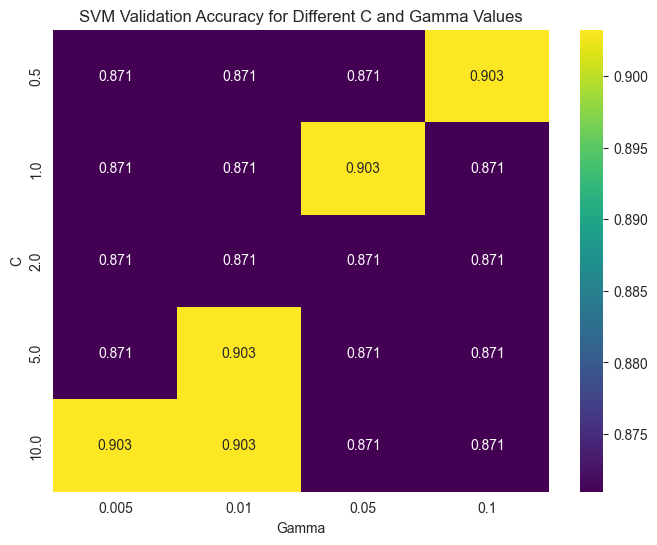

In [27]:
df_results = pd.DataFrame(results, columns=['C', 'gamma', 'accuracy'])

pivot_df = df_results.pivot(index='C', columns='gamma', values='accuracy')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df, annot=True, cmap='viridis', fmt=".3f")
plt.title('SVM Validation Accuracy for Different C and Gamma Values')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.show()

In [28]:
df_test = pd.read_csv("wildfires_test.csv")

In [29]:
enc = OrdinalEncoder(categories=[is_fire])

In [30]:
df_test['fire'] = enc.fit_transform(df_test[['fire']])

In [31]:
df_test = df_test.drop(columns=['year','day','wind_speed', 'month'])

In [32]:
X_test = df_test.drop('fire', axis=1)

In [33]:
y_test = df_test['fire']

In [34]:
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

In [35]:
best_model = svm.SVC(C=10, gamma=0.01, kernel='rbf')

In [36]:
best_model.fit(X_train, y_train)

,C,10
,kernel,'rbf'
,degree,3
,gamma,0.01
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [37]:
y_pred_test = best_model.predict(X_test_scaled)
df_test['predicted_fire'] = y_pred_test

In [38]:
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

Accuracy: 0.82

Confusion Matrix:
 [[19  3]
 [ 6 22]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.86      0.81        22
         1.0       0.88      0.79      0.83        28

    accuracy                           0.82        50
   macro avg       0.82      0.82      0.82        50
weighted avg       0.83      0.82      0.82        50

